In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from collections import Counter
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
data = pd.read_csv('hr_data.csv')
data.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,1003,2,157,3,0,1,0,sales,low
1,1005,5,262,6,0,1,0,sales,medium
2,1486,7,272,4,0,1,0,sales,medium
3,1038,5,223,5,0,1,0,sales,low
4,1057,2,159,3,0,1,0,sales,low


In [3]:
data.shape

(14999, 9)

In [4]:
data.size

134991

In [5]:
data=data.drop(columns=['employee_id'],axis=1)

In [6]:
data.shape

(14999, 8)

In [7]:
data.size

119992

In [8]:
data.describe()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   number_project         14999 non-null  int64 
 1   average_montly_hours   14999 non-null  int64 
 2   time_spend_company     14999 non-null  int64 
 3   Work_accident          14999 non-null  int64 
 4   left                   14999 non-null  int64 
 5   promotion_last_5years  14999 non-null  int64 
 6   department             14999 non-null  object
 7   salary                 14999 non-null  object
dtypes: int64(6), object(2)
memory usage: 937.6+ KB


In [10]:
data.isnull().sum()

number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [11]:
data['number_project'].value_counts()

4    4365
3    4055
5    2761
2    2388
6    1174
7     256
Name: number_project, dtype: int64

In [12]:
data['average_montly_hours'].value_counts()

156    153
135    153
149    148
151    147
160    136
      ... 
297      7
303      6
288      6
299      6
96       6
Name: average_montly_hours, Length: 215, dtype: int64

In [13]:
data['time_spend_company'].value_counts()

3     6443
2     3244
4     2557
5     1473
6      718
10     214
7      188
8      162
Name: time_spend_company, dtype: int64

In [14]:
data['Work_accident'].value_counts()

0    12830
1     2169
Name: Work_accident, dtype: int64

In [15]:
data['promotion_last_5years'].value_counts()

0    14680
1      319
Name: promotion_last_5years, dtype: int64

In [16]:
data['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

In [17]:
data['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [18]:
data['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [19]:
corr = data.corr()
corr['left'].sort_values(ascending = False)

left                     1.000000
time_spend_company       0.144822
average_montly_hours     0.071287
number_project           0.023787
promotion_last_5years   -0.061788
Work_accident           -0.154622
Name: left, dtype: float64

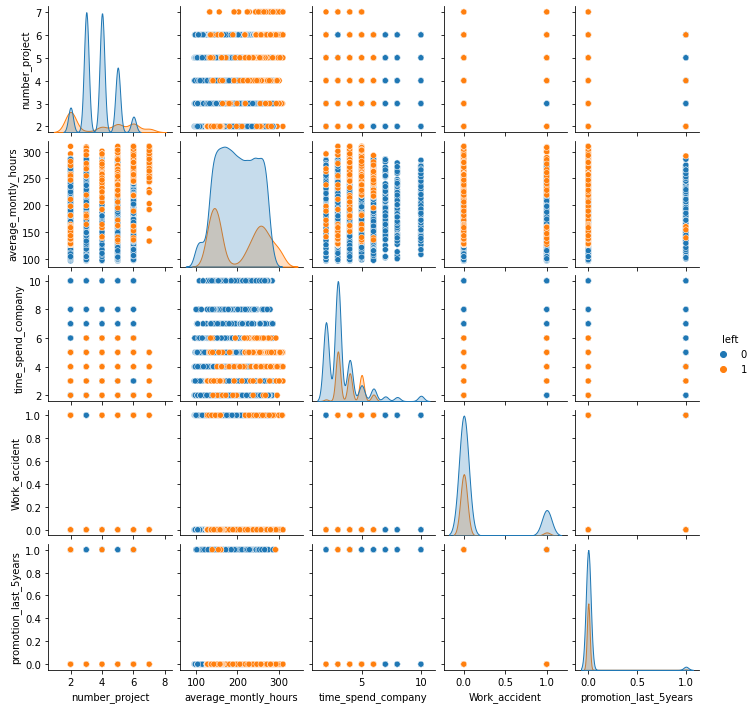

In [20]:
# pair plot
sns.pairplot(data,hue='left',size=2)

array([[<AxesSubplot:title={'center':'number_project'}>,
        <AxesSubplot:title={'center':'average_montly_hours'}>],
       [<AxesSubplot:title={'center':'time_spend_company'}>,
        <AxesSubplot:title={'center':'Work_accident'}>],
       [<AxesSubplot:title={'center':'left'}>,
        <AxesSubplot:title={'center':'promotion_last_5years'}>]],
      dtype=object)

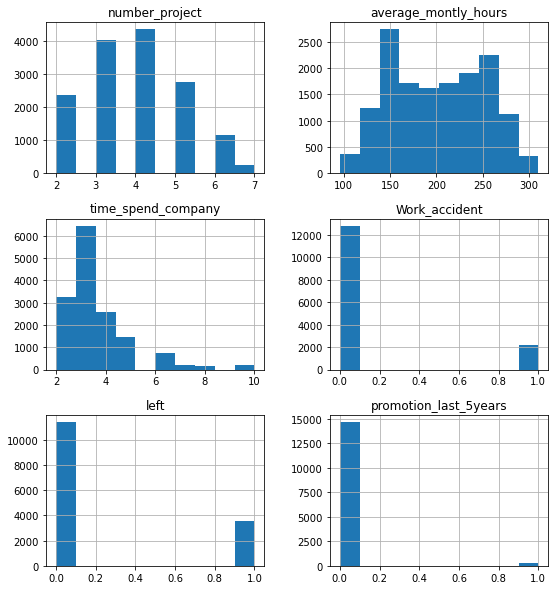

In [21]:
data.hist(figsize=(9,10))

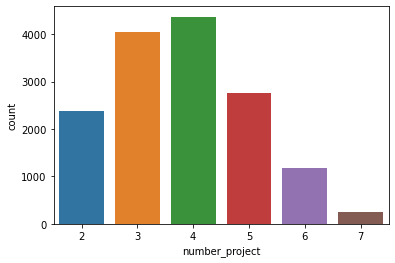

In [22]:
sns.countplot(data['number_project'])
plt.show()

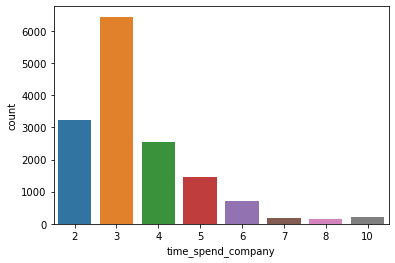

In [23]:
sns.countplot(data['time_spend_company'])
plt.show()

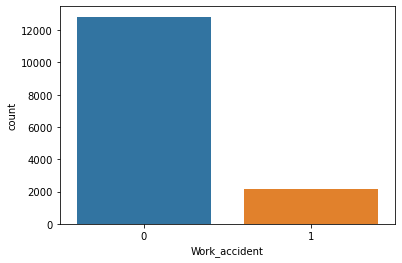

In [24]:
sns.countplot(data['Work_accident'])
plt.show()

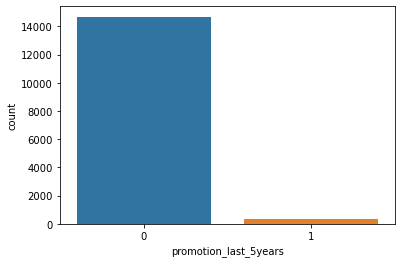

In [25]:
sns.countplot(data['promotion_last_5years'])
plt.show()

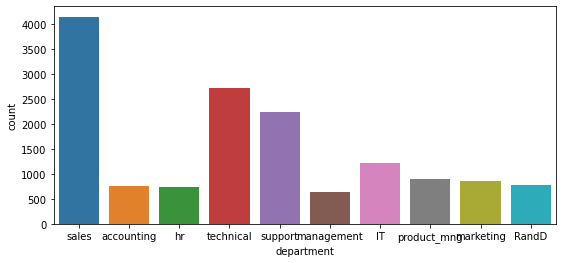

In [26]:
fig, ax = plt.subplots(figsize=(9,4))
sns.countplot(data['department'])
plt.show()

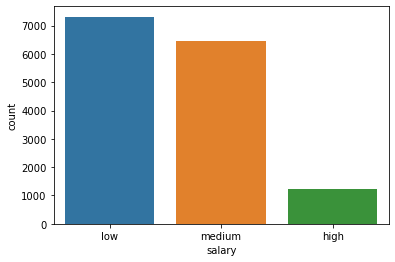

In [27]:
sns.countplot(data['salary'])
plt.show()

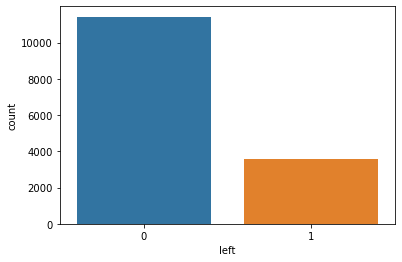

In [28]:
sns.countplot(data['left'])
plt.show()

<AxesSubplot:xlabel='promotion_last_5years', ylabel='number_project'>

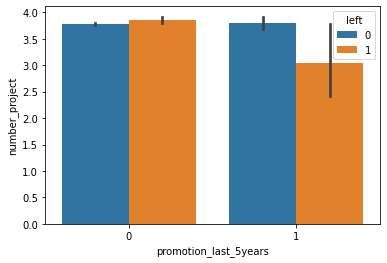

In [29]:
sns.barplot(data['promotion_last_5years'],data['number_project'],hue=data['left'])

<AxesSubplot:xlabel='time_spend_company', ylabel='average_montly_hours'>

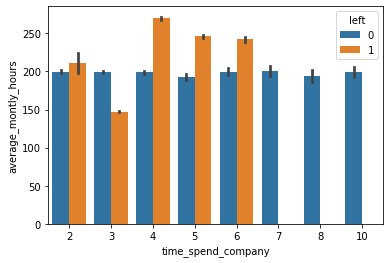

In [30]:
sns.barplot(data['time_spend_company'],data['average_montly_hours'],hue=data['left'])

<AxesSubplot:xlabel='Work_accident', ylabel='left'>

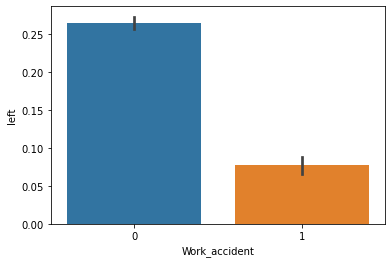

In [31]:
sns.barplot(data['Work_accident'],data['left'])

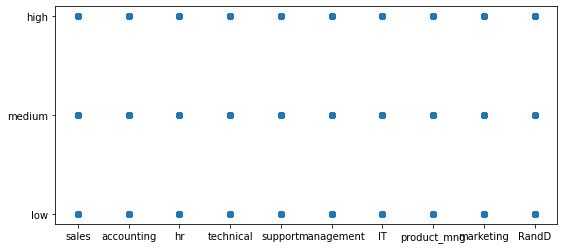

In [32]:
fig, ax = plt.subplots(figsize=(9,4))
plt.scatter(data['department'],data['salary'])

<AxesSubplot:>

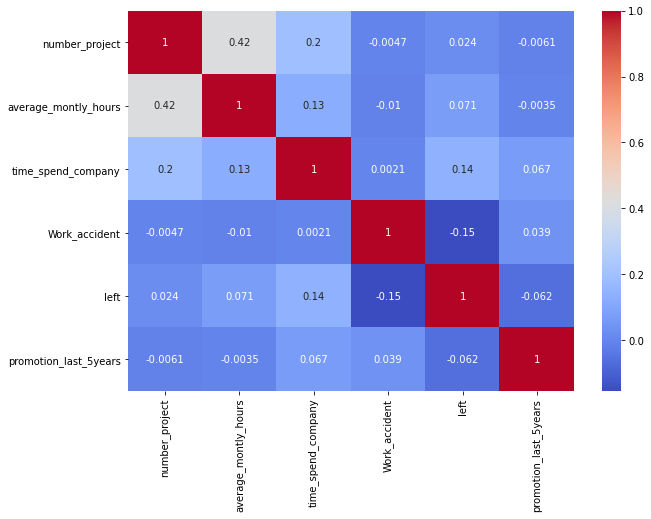

In [33]:
# heat map
corr = data.corr()
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(corr, annot=True, ax=ax, cmap = 'coolwarm')

In [34]:
# LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for x in data:
    if data[x].dtypes=='object':
        data[x] = le.fit_transform(data[x])

In [35]:
data.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,2,157,3,0,1,0,7,1
1,5,262,6,0,1,0,7,2
2,7,272,4,0,1,0,7,2
3,5,223,5,0,1,0,7,1
4,2,159,3,0,1,0,7,1


In [36]:
# treain_test_split
x = data.drop(columns=['left'])
y = data['left']

In [37]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=13)

In [38]:
x_train.shape

(10499, 7)

In [39]:
x_test.shape

(4500, 7)

In [40]:
model = LogisticRegression()
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
accuracy_score(y_test,y_predict)

0.7511111111111111

In [41]:
y_test

7399     0
1119     1
1509     1
6382     0
11521    0
        ..
6474     0
1157     1
5240     0
14020    0
12481    1
Name: left, Length: 4500, dtype: int64

In [42]:
y_predict

array([0, 0, 0, ..., 0, 0, 0])

In [43]:
pd.crosstab(y_test,y_predict)

col_0,0,1
left,,
0,3380,54
1,1066,0


In [44]:
confusion_matrix(y_test,y_predict)

array([[3380,   54],
       [1066,    0]])

In [45]:
precision_score(y_test,y_predict)

0.0

In [46]:
recall_score(y_test,y_predict)

0.0

In [47]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.76      0.98      0.86      3434
           1       0.00      0.00      0.00      1066

    accuracy                           0.75      4500
   macro avg       0.38      0.49      0.43      4500
weighted avg       0.58      0.75      0.65      4500



In [48]:
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
accuracy_score(y_test,y_predict)

0.9593333333333334

In [49]:
y_predict

array([0, 1, 1, ..., 0, 0, 1])

In [50]:
confusion_matrix(y_test,y_predict)

array([[3336,   98],
       [  85,  981]])

In [51]:
precision_score(y_test,y_predict)

0.9091751621872104

In [52]:
recall_score(y_test,y_predict)

0.9202626641651032

In [53]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      3434
           1       0.91      0.92      0.91      1066

    accuracy                           0.96      4500
   macro avg       0.94      0.95      0.94      4500
weighted avg       0.96      0.96      0.96      4500



In [54]:
# RandomForestClassifier 
model = RandomForestClassifier(random_state=13,n_estimators=100)
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
accuracy_score(y_test,y_predict)

0.9704444444444444

In [55]:
y_predict

array([0, 1, 1, ..., 0, 0, 1])

In [56]:
confusion_matrix(y_test,y_predict)

array([[3369,   65],
       [  68,  998]])

In [57]:
precision_score(y_test,y_predict)

0.9388523047977423

In [58]:
recall_score(y_test,y_predict)

0.9362101313320825

In [59]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3434
           1       0.94      0.94      0.94      1066

    accuracy                           0.97      4500
   macro avg       0.96      0.96      0.96      4500
weighted avg       0.97      0.97      0.97      4500



In [60]:
# MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(100),random_state=13)
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
accuracy_score(y_test,y_predict)

0.8468888888888889

In [61]:
y_predict

array([0, 1, 0, ..., 0, 0, 1])

In [62]:
pd.crosstab(y_test,y_predict)

col_0,0,1
left,,
0,3169,265
1,424,642


In [63]:
confusion_matrix(y_test,y_predict)

array([[3169,  265],
       [ 424,  642]])

In [64]:
precision_score(y_test,y_predict)

0.7078280044101434

In [65]:
recall_score(y_test,y_predict)

0.6022514071294559

In [66]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      3434
           1       0.71      0.60      0.65      1066

    accuracy                           0.85      4500
   macro avg       0.79      0.76      0.78      4500
weighted avg       0.84      0.85      0.84      4500



In [67]:
# KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
y_predict

array([0, 1, 1, ..., 0, 0, 1])

In [68]:
print("accuracy:",accuracy_score(y_test,y_predict))

accuracy: 0.9293333333333333


In [69]:
confusion_matrix(y_test,y_predict)

array([[3211,  223],
       [  95,  971]])

In [70]:
pd.crosstab(y_test,y_predict)

col_0,0,1
left,,
0,3211,223
1,95,971


In [71]:
y_predict = model.predict(x_test)

In [72]:
matrix=confusion_matrix(y_test,y_predict)
print(matrix)

[[3211  223]
 [  95  971]]


<AxesSubplot:>

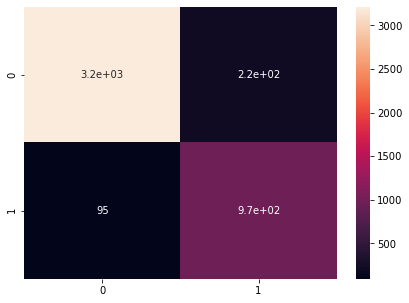

In [73]:
# heat map
plt.figure(figsize = (7,5))
sns.heatmap(matrix,annot=True)

In [74]:
# XGBClassifier
model =XGBClassifier(learning_rate = 0.1,random_state=13,n_estimators=100)
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
accuracy_score(y_test,y_predict)

0.9635555555555556

In [75]:
pd.crosstab(y_test,y_predict)

col_0,0,1
left,,
0,3353,81
1,83,983


In [76]:
confusion_matrix(y_test,y_predict)

array([[3353,   81],
       [  83,  983]])

In [77]:
precision_score(y_test,y_predict)

0.9238721804511278

In [78]:
recall_score(y_test,y_predict)

0.9221388367729831

In [79]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3434
           1       0.92      0.92      0.92      1066

    accuracy                           0.96      4500
   macro avg       0.95      0.95      0.95      4500
weighted avg       0.96      0.96      0.96      4500



In [80]:
# support victor machine
model = SVC(gamma=0.01,kernel='rbf')
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
accuracy_score(y_test,y_predict)

0.9226666666666666

In [81]:
y_predict

array([0, 1, 1, ..., 0, 0, 1])

In [82]:
pd.crosstab(y_test,y_predict)

col_0,0,1
left,,
0,3287,147
1,201,865


In [83]:
confusion_matrix(y_test,y_predict)

array([[3287,  147],
       [ 201,  865]])

In [84]:
precision_score(y_test,y_predict)

0.8547430830039525

In [85]:
recall_score(y_test,y_predict)

0.8114446529080676

In [86]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      3434
           1       0.85      0.81      0.83      1066

    accuracy                           0.92      4500
   macro avg       0.90      0.88      0.89      4500
weighted avg       0.92      0.92      0.92      4500



In [87]:
print(Counter(y_test))

Counter({0: 3434, 1: 1066})


In [88]:
# principle componet analysis
pca = PCA()
x = pd.DataFrame(pca.fit_transform(x))

In [89]:
x.head()

,0,1,2,3,4,5,6
0,-44.067893,-1.138800,-0.674940,1.217653,0.334862,-0.149557,-0.017926
1,60.968009,-1.089220,2.354062,0.072951,-0.650752,-0.142048,-0.031266
2,70.980533,-1.118893,0.909356,-2.306233,-0.630172,-0.138214,-0.012749
3,21.966525,-1.109902,1.642662,-0.538272,0.351269,-0.145697,-0.024885
4,-42.068013,-1.138372,-0.687743,1.235445,0.334920,-0.149416,-0.017899


In [90]:
pca.explained_variance_ratio_

array([9.95165896e-01, 3.28351480e-03, 8.65396507e-04, 4.71380247e-04,
       1.56212919e-04, 4.93578790e-05, 8.24210048e-06])

<AxesSubplot:>

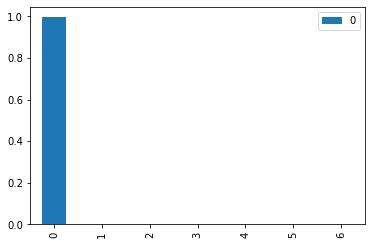

In [91]:
covid_var = pd.DataFrame(pca.explained_variance_ratio_)
covid_var.plot(kind = 'bar')

In [92]:
pca.explained_variance_ratio_[0:-1].sum()

0.9999917578995239

In [93]:
x = x.iloc[:,:-1]
x.head(5)

,0,1,2,3,4,5
0,-44.067893,-1.138800,-0.674940,1.217653,0.334862,-0.149557
1,60.968009,-1.089220,2.354062,0.072951,-0.650752,-0.142048
2,70.980533,-1.118893,0.909356,-2.306233,-0.630172,-0.138214
3,21.966525,-1.109902,1.642662,-0.538272,0.351269,-0.145697
4,-42.068013,-1.138372,-0.687743,1.235445,0.334920,-0.149416


In [94]:
#Dataframe for models
models = {"Logistic Regression": LogisticRegression(),
          "Random Forest": RandomForestClassifier(),
          "DecisionTree": DecisionTreeClassifier(),
          "KNN": KNeighborsClassifier(),
          "MPL":MLPClassifier(),
          "XGB": XGBClassifier(),
          "SVM": SVC()}
          
          

# Create a function to fit and score models
def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(x_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [95]:
model_scores = fit_and_score(models=models,
                             x_train=x_train,
                             x_test=x_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

{'Logistic Regression': 0.7511111111111111,
 'Random Forest': 0.9708888888888889,
 'DecisionTree': 0.9575555555555556,
 'KNN': 0.9293333333333333,
 'MPL': 0.8748888888888889,
 'XGB': 0.9653333333333334,
 'SVM': 0.7842222222222223}

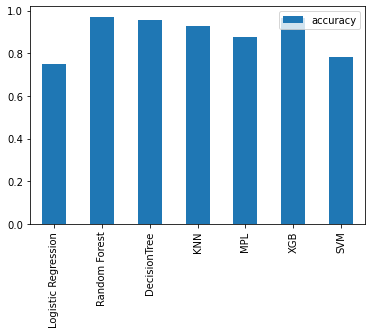

In [96]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();